In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.transform import rotate
from skimage.util import random_noise
import os

In [2]:
# files can be found here https://github.com/rois-codh/kmnist
train_data_imgs = np.load('data/k49-train-imgs.npz')
train_data_imgs = train_data_imgs.f.arr_0

train_data_labels = np.load('data/k49-train-labels.npz')
train_data_labels = train_data_labels.f.arr_0

In [3]:
train_data_imgs_aug_lst = [] # list to store augmented data

for i in tqdm(range(train_data_imgs.shape[0])):
    prob = np.random.choice([True, False]) #randomly choose a transformation to apply
    if prob:
        rangle = np.random.randint(-15, 15)
        img_aug = rotate(train_data_imgs[i], angle=rangle, mode = 'wrap')
    else:
        img_aug = random_noise(train_data_imgs[i],var=0.2**2)
    train_data_imgs_aug_lst.append(img_aug)

100%|██████████| 232365/232365 [00:47<00:00, 4869.27it/s]


In [4]:
# convert list to np.array
train_data_imgs_aug = np.asarray(train_data_imgs_aug_lst)

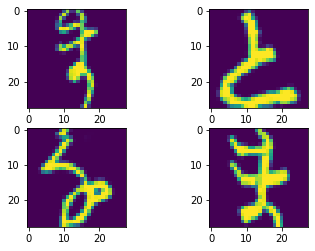

In [5]:
# original data
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train_data_imgs[i])
plt.show()

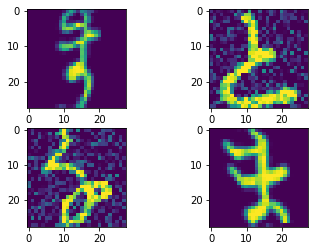

In [6]:
# augmented data
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(train_data_imgs_aug[i])
plt.show()

In [7]:
# concatenate training data with augmented data
train_data_full = [*train_data_imgs,*train_data_imgs_aug]

In [ ]:
# save concatenated data into a npz file
np.savez('train_data_full.npz',train_data_full)

In [ ]:
# concatenate labels (the labels are the same)
train_labels_full = [*train_data_labels, *train_data_labels]

In [ ]:
# save concatenated labels into a npz file
np.savez('train_labels_full.npz',train_labels_full)